In [7]:
import pandas as pd
# Import required libraries and dependencies

import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split

In [10]:
import os
from sqlalchemy import create_engine
import pandas as pd

# Obtén la ruta absoluta al archivo de base de datos SQLite
database_path = os.path.abspath('../Sqlite/AttributesBillboard.sqlite')

# Establece la conexión a la base de datos SQLite
engine = create_engine(f'sqlite:///{database_path}')

# Resto del código sin cambios
sql_query = 'SELECT * FROM attribillboard'
attribill_df = pd.read_sql_query(sql_query, engine)
engine.dispose()
print(attribill_df.info())
attribill_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4774 entries, 0 to 4773
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 4774 non-null   int64  
 1   Artist            4774 non-null   object 
 2   Name              4774 non-null   object 
 3   Weekly_rank       4774 non-null   int64  
 4   Peak_position     4774 non-null   object 
 5   Weeks_on_chart    4774 non-null   object 
 6   Week              4774 non-null   object 
 7   Date              4774 non-null   object 
 8   Genre             4774 non-null   object 
 9   Writing_Credits   4774 non-null   object 
 10  Lyrics            4774 non-null   object 
 11  Features          4774 non-null   object 
 12  Acousticness      4774 non-null   float64
 13  Album             4774 non-null   object 
 14  Danceability      4774 non-null   float64
 15  Duration          4774 non-null   int64  
 16  Energy            4774 non-null   float64


,X,Artist,Name,Weekly_rank,Peak_position,Weeks_on_chart,Week,Date,Genre,Writing_Credits,...,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,jonas brothers,sucker,6,1,17,06/07/2019,"March 1, 2019","Alternative Pop,Boy Band,Teen Pop,Pop-Rock,Pop","Ryan tedder, Louis bell, Frank dukes, Nick jon...",...,False,0.0,0.1060,-5.065,0,81,0.0588,137.958,4,0.952
1,1,taylor swift,you need to calm down,13,2,2,06/07/2019,"June 14, 2019","Synth-Pop,LGBTQ+,Pop","Joel little, Taylor swift",...,False,0.0,0.0637,-5.617,1,89,0.0553,85.026,4,0.714
2,2,panic! at the disco,"hey look ma, i made it",24,24,11,06/07/2019,"June 22, 2018","Pop-Rock,Jazz Fusion,Alternative,Alternative P...","Jake sinclair, Michael angelakos, Dillon franc...",...,False,0.0,0.1210,-3.337,1,81,0.0695,107.936,4,0.580
3,3,lee brice,rumor,26,25,16,06/07/2019,"November 3, 2017",Country,"Kyle jacobs, Ashley gorley, Lee brice",...,False,0.0,0.1150,-6.857,1,79,0.0486,140.975,4,0.599
4,4,panic! at the disco,high hopes,32,4,47,06/07/2019,"May 23, 2018","Adult Alternative,Rock,Power Pop,Pop-Rock,Alte...","Sam hollander, Cook classics, Tayla parx, Jake...",...,False,0.0,0.0640,-2.729,1,87,0.0618,82.014,4,0.681


In [2]:
attribill_df = pd.read_csv("../Resources/attributesBillboard.csv")
attribill_df = attribill_df.drop(columns=["Unnamed: 0"])
print(attribill_df.info())
attribill_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4774 entries, 0 to 4773
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            4774 non-null   object 
 1   Name              4774 non-null   object 
 2   Weekly.rank       4774 non-null   int64  
 3   Peak.position     4229 non-null   float64
 4   Weeks.on.chart    4229 non-null   float64
 5   Week              4774 non-null   object 
 6   Date              3938 non-null   object 
 7   Genre             4774 non-null   object 
 8   Writing.Credits   4279 non-null   object 
 9   Lyrics            4774 non-null   object 
 10  Features          717 non-null    object 
 11  Acousticness      4774 non-null   float64
 12  Album             4774 non-null   object 
 13  Danceability      4774 non-null   float64
 14  Duration          4774 non-null   int64  
 15  Energy            4774 non-null   float64
 16  Explicit          4774 non-null   bool   


,Artist,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,...,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,jonas brothers,sucker,6,1.0,17.0,2019-07-06,"March 1, 2019","Alternative Pop,Boy Band,Teen Pop,Pop-Rock,Pop","Ryan tedder, Louis bell, Frank dukes, Nick jon...",Sucker \nWe go together\nBetter than birds of ...,...,False,0.0,0.1060,-5.065,0,81,0.0588,137.958,4,0.952
1,taylor swift,you need to calm down,13,2.0,2.0,2019-07-06,"June 14, 2019","Synth-Pop,LGBTQ+,Pop","Joel little, Taylor swift",You Need To Calm Down \nYou are somebody that ...,...,False,0.0,0.0637,-5.617,1,89,0.0553,85.026,4,0.714
2,panic! at the disco,"hey look ma, i made it",24,24.0,11.0,2019-07-06,"June 22, 2018","Pop-Rock,Jazz Fusion,Alternative,Alternative P...","Jake sinclair, Michael angelakos, Dillon franc...","Hey Look Ma, I Made It \nAll my life, been hus...",...,False,0.0,0.1210,-3.337,1,81,0.0695,107.936,4,0.580
3,lee brice,rumor,26,25.0,16.0,2019-07-06,"November 3, 2017",Country,"Kyle jacobs, Ashley gorley, Lee brice",Rumor \nGirl you know I've known you forever\n...,...,False,0.0,0.1150,-6.857,1,79,0.0486,140.975,4,0.599
4,panic! at the disco,high hopes,32,4.0,47.0,2019-07-06,"May 23, 2018","Adult Alternative,Rock,Power Pop,Pop-Rock,Alte...","Sam hollander, Cook classics, Tayla parx, Jake...","High Hopes \nHigh, high hopes\nHad to have hig...",...,False,0.0,0.0640,-2.729,1,87,0.0618,82.014,4,0.681


In [3]:
attribill_df["is_popular"] = attribill_df["Popularity"] >= 58
attribill_df = attribill_df.drop(columns=["Popularity"])
attribill_df.head()

,Artist,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,...,Explicit,Instrumentalness,Liveness,Loudness,Mode,Speechiness,Tempo,TimeSignature,Valence,is_popular
0,jonas brothers,sucker,6,1.0,17.0,2019-07-06,"March 1, 2019","Alternative Pop,Boy Band,Teen Pop,Pop-Rock,Pop","Ryan tedder, Louis bell, Frank dukes, Nick jon...",Sucker \nWe go together\nBetter than birds of ...,...,False,0.0,0.1060,-5.065,0,0.0588,137.958,4,0.952,True
1,taylor swift,you need to calm down,13,2.0,2.0,2019-07-06,"June 14, 2019","Synth-Pop,LGBTQ+,Pop","Joel little, Taylor swift",You Need To Calm Down \nYou are somebody that ...,...,False,0.0,0.0637,-5.617,1,0.0553,85.026,4,0.714,True
2,panic! at the disco,"hey look ma, i made it",24,24.0,11.0,2019-07-06,"June 22, 2018","Pop-Rock,Jazz Fusion,Alternative,Alternative P...","Jake sinclair, Michael angelakos, Dillon franc...","Hey Look Ma, I Made It \nAll my life, been hus...",...,False,0.0,0.1210,-3.337,1,0.0695,107.936,4,0.580,True
3,lee brice,rumor,26,25.0,16.0,2019-07-06,"November 3, 2017",Country,"Kyle jacobs, Ashley gorley, Lee brice",Rumor \nGirl you know I've known you forever\n...,...,False,0.0,0.1150,-6.857,1,0.0486,140.975,4,0.599,True
4,panic! at the disco,high hopes,32,4.0,47.0,2019-07-06,"May 23, 2018","Adult Alternative,Rock,Power Pop,Pop-Rock,Alte...","Sam hollander, Cook classics, Tayla parx, Jake...","High Hopes \nHigh, high hopes\nHad to have hig...",...,False,0.0,0.0640,-2.729,1,0.0618,82.014,4,0.681,True


In [4]:
columns_to_drop = ['Date', 'Artist', 'Name', 'Week', 'Genre', 'Writing.Credits', 'Lyrics', 'Features', 'Album']
data = attribill_df.drop(columns=columns_to_drop)

In [5]:
X = data.drop('is_popular', axis=1)
y = data['is_popular']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
data.dtypes

Weekly.rank           int64
Peak.position       float64
Weeks.on.chart      float64
Acousticness        float64
Danceability        float64
Duration              int64
Energy              float64
Explicit               bool
Instrumentalness    float64
Liveness            float64
Loudness            float64
Mode                  int64
Speechiness         float64
Tempo               float64
TimeSignature         int64
Valence             float64
is_popular             bool
dtype: object

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
import numpy as np

# Encuentra índices de filas con NaN en X_train_scaled
nan_indices_train = np.isnan(X_train_scaled).any(axis=1)

# Elimina filas con NaN en X_train_scaled y ajusta y_train en consecuencia
X_train_scaled = X_train_scaled[~nan_indices_train]
y_train = y_train[~nan_indices_train]

# Haz lo mismo para los datos de prueba
nan_indices_test = np.isnan(X_test_scaled).any(axis=1)
X_test_scaled = X_test_scaled[~nan_indices_test]
y_test = y_test[~nan_indices_test]

In [9]:
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [10]:
y_pred = rf_classifier.predict(X_test_scaled)

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6908665105386417
Confusion Matrix:
 [[560  51]
 [213  30]]
Classification Report:
               precision    recall  f1-score   support

       False       0.72      0.92      0.81       611
        True       0.37      0.12      0.19       243

    accuracy                           0.69       854
   macro avg       0.55      0.52      0.50       854
weighted avg       0.62      0.69      0.63       854



In [12]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,560,51
Actual 1,213,30


Accuracy Score : 0.6908665105386417
Classification Report
              precision    recall  f1-score   support

       False       0.72      0.92      0.81       611
        True       0.37      0.12      0.19       243

    accuracy                           0.69       854
   macro avg       0.55      0.52      0.50       854
weighted avg       0.62      0.69      0.63       854



In [13]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_classifier.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_classifier.feature_importances_, X.columns), reverse=True)

[(0.08619844783913172, 'Acousticness'),
 (0.08253396999242307, 'Valence'),
 (0.08145055374707869, 'Speechiness'),
 (0.08143500749310378, 'Energy'),
 (0.07884512545436004, 'Peak.position'),
 (0.07876389904292622, 'Duration'),
 (0.07831929423502157, 'Loudness'),
 (0.07778842483061332, 'Liveness'),
 (0.07614674481145481, 'Danceability'),
 (0.07361563417095773, 'Tempo'),
 (0.07148391673301631, 'Weekly.rank'),
 (0.05770104588391988, 'Weeks.on.chart'),
 (0.046035985218668384, 'Instrumentalness'),
 (0.015481756982717823, 'Explicit'),
 (0.009740471087870621, 'Mode'),
 (0.004459722476735918, 'TimeSignature')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

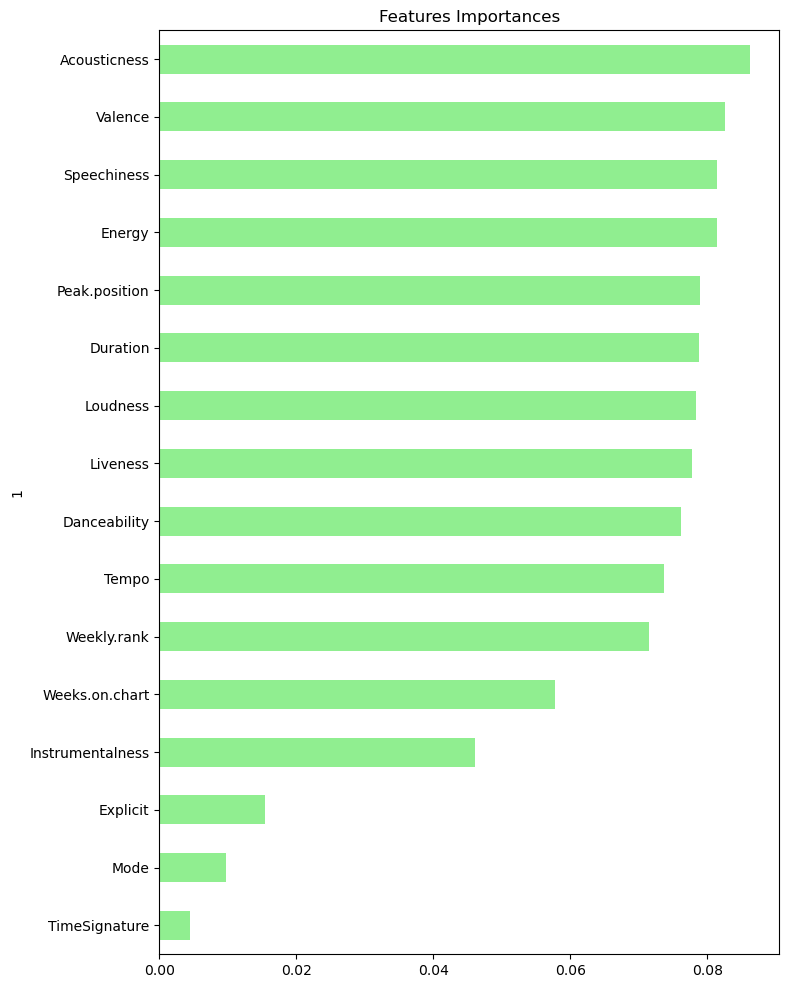

In [14]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_classifier.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances',figsize=(8,12), legend=False)